## Ranked Plot Origin

This plot shows the relationship between the origin of each Zebrafish mature seed and the abundance of the seed in the Zebrafish genome. The color of each line represents the origin and the x axis represents the abundance. 

In preparation for this plot, I used a getSeed script to generate the 7mer seed of each sequence. 

In [ ]:
from numpy import loadtxt
import pandas as pd
def getSeed(filename, x1, x2):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    
    #substring from x1, x2
    filename_data = [sub[x1:x2] for sub in filename_data]

    return filename_data

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()
    
#print(reverse_compliment("dre_mature", 1, 8))

print_text("dre_mature_seeds", getSeed("dre_mature", 1,8))

I also pull the MirGeneDB ID for each mature sequence. The sequences are formatted with s ">" character to begin the string and a "/n" at the end, so those are removed. They also contain the identifyer of either "_3p" or "_5p", which is not included in the MirGeneDB ID for the node of origin, so those are removed as well. 

In [29]:
from numpy import loadtxt
import pandas as pd
def getID(filename):
    #import file
    data = [];
    cnt = 1;
    with open(filename+".txt", 'r') as infile:
        for line in infile:
            if cnt%2 == 1:
                data.append(line.replace(">","").replace("\n","")[:-3])
            cnt+=1
    
    return data

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()
    
#print(getID("dre_mature"))

print_text("dre_mature_IDs", getID("dre_mature"))

I then added that data as a column in the Mature Abundance Data (from the Bar Ranked Plot) to create dre_mature_origin_abundance.csv. We also use seed_origin.csv to generate the dictionary of all the origins. Below is the script that prints the origin associated with each seed.

In [76]:
import csv
from numpy import loadtxt
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

mature_seed = loadtxt("dre_mature_IDs.txt", delimiter="\z",dtype="str")
origin_dict = get_dict("seed_origin")

out_arr = []

for i in mature_seed:
    if i in origin_dict:
        out_arr.append(origin_dict[i])
    else:
        out_arr.append("None")
print_text("mature_seed_origin", out_arr)

Lets now do the same with the abundance data

In [87]:
import csv
from numpy import loadtxt
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

mature_seed = loadtxt("dre_mature_seeds.txt", delimiter="\z",dtype="str")
abundance_dict = get_dict("7seed_abundance")
out_arr = []

for i in mature_seed:
    out_arr.append(abundance_dict[i])
print_text("mature_seed_abundance", out_arr)

We can also do the same for the reverse compliments. First, we'll generate the reverse compliments from the dre_mature_seeds.txt, then we can generate the abundances from there as well. 

In [79]:
from numpy import loadtxt
import pandas as pd
def reverse_compliment(filename):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")

    #Replace A with X
    filename_data = [sub.replace('A', 'X') for sub in filename_data]
    
    #Replace U with A
    filename_data = [sub.replace('U', 'A') for sub in filename_data]
    
    #Replace X with U
    filename_data = [sub.replace('X', 'U') for sub in filename_data]
    
    #Replace C with X
    filename_data = [sub.replace('C', 'X') for sub in filename_data]
    
    #Replace G with C
    filename_data = [sub.replace('G', 'C') for sub in filename_data]
    
    #Replace X with G
    filename_data = [sub.replace('X', 'G') for sub in filename_data]
    
    #Reverse all the strings
    filename_data_reverse = [sub[::-1] for sub in filename_data]
    
    return filename_data_reverse

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("reverse_mature_seeds", reverse_compliment("dre_mature_seeds"))

In [86]:
import csv
from numpy import loadtxt
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

reverse_seeds = loadtxt("reverse_mature_seeds.txt", delimiter="\z",dtype="str")
abundance_dict = get_dict("7seed_abundance")
out_arr = []

for i in reverse_seeds:
    out_arr.append(abundance_dict[i])
print_text("reverse_mature_seed_abundance", out_arr)

Finally, we plot our data

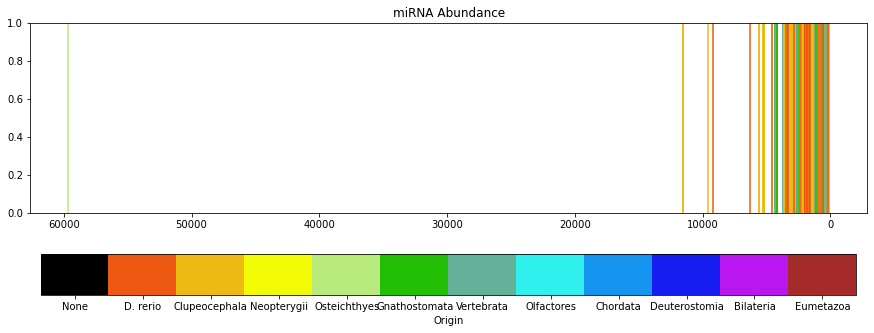

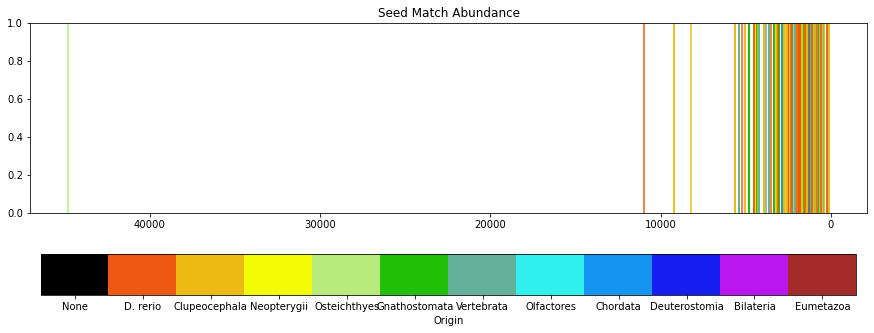

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.colors as colors

def getColor(origin):
    if(origin=='D. rerio'):
        return '#ed5813'
    if(origin=='Clupeocephala'):
        return '#edba13'
    if(origin=='Neopterygii'):
        return '#f2fa05'
    if(origin=='Osteichthyes'):
        return '#b9eb7c'
    if(origin=='Gnathostomata'):
        return '#22bf06'
    if(origin=='Vertebrata'):
        return '#64b098'
    if(origin=='Olfactores'):
        return '#30f0ed'
    if(origin=='Chordata'):
        return '#1695f0'
    if(origin=='Deuterostomia'):
        return '#161df0'
    if(origin=='Bilateria'):
        return '#b916f0'
    if(origin=='Eumetazoa'):
        return 'brown'
    else:
        return "black"
    
def make_rank_plot(filename):
    #import the zebrafish dictionary
    df = pd.read_csv(filename + ".csv")    

    fig = plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()

    for ind in df.index:
        plt.axvline(x=df['abundance (Seed)'][ind], color = getColor(df['Origin'][ind]) )
        
    cmap = colors.ListedColormap(['black', '#ed5813','#edba13', '#f2fa05', '#b9eb7c', '#22bf06', '#64b098', '#30f0ed', '#1695f0', '#161df0', '#b916f0', 'brown'])
    bounds=[-.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal', label='Origin')
    cbar.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11])
    cbar.set_ticklabels(['None','D. rerio','Clupeocephala','Neopterygii','Osteichthyes','Gnathostomata','Vertebrata','Olfactores','Chordata','Deuterostomia','Bilateria','Eumetazoa'])
    
    plt.title("miRNA Abundance")
   
   
    fig = plt.figure(figsize=(15, 5))
    ax = plt.gca()
    ax.invert_xaxis()

    for ind in df.index:
        plt.axvline(x=df['abundance (reverse)'][ind], color = getColor(df['Origin'][ind]) )
        
    cmap = colors.ListedColormap(['black', '#ed5813','#edba13', '#f2fa05', '#b9eb7c', '#22bf06', '#64b098', '#30f0ed', '#1695f0', '#161df0', '#b916f0', 'brown'])
    bounds=[-.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal', label='Origin')
    cbar.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11])
    cbar.set_ticklabels(['None','D. rerio','Clupeocephala','Neopterygii','Osteichthyes','Gnathostomata','Vertebrata','Olfactores','Chordata','Deuterostomia','Bilateria','Eumetazoa'])
    
    plt.title("Seed Match Abundance")
    plt.savefig(filename+" combined")
    plt.show()
    

make_rank_plot("dre_mature_origin_abundance")